트리계열 모델 학습
1. 배깅 - randomforest
2. 부스팅 - adaboost, gradientboosting, xgboost,lightbgm,catboost


In [ ]:
# bootstrapping = 가설검증을 계산하기 전에 random sampling을 적용하는 방법(중복 허용)
# 예) 중복을 허용해서 임의로 100개를 뽑아서 평균을 구하는것 그것을 계속 반복하는 개념
# 에) 즉 측정된 n개의 데이터 중에서 중복을 허용하여 m개를 랜덤으로 뽑고 그들의 평균 구하기를 여러번 반복함
# 너무 방대한 데이터의 경우에 사용하면 좋음 ex) 전 세계 인구 측정)

배깅(bagging)은 boostrap aggregating 의 준말로서 주어진 데이터에 대해서 여러 개의 부트스트랩(bootstrap) 자료를 생성하고 각 부트스트랩 자료를 모델링 한 후 결합하여 최종의 예측 모형을 산출하는 방법입니다.

ex ) 범주형 데이터일때로 가정한다면, 4개는 A로 예측 2개는 B로 예측 했다면 최종결과로 A로 예측됨


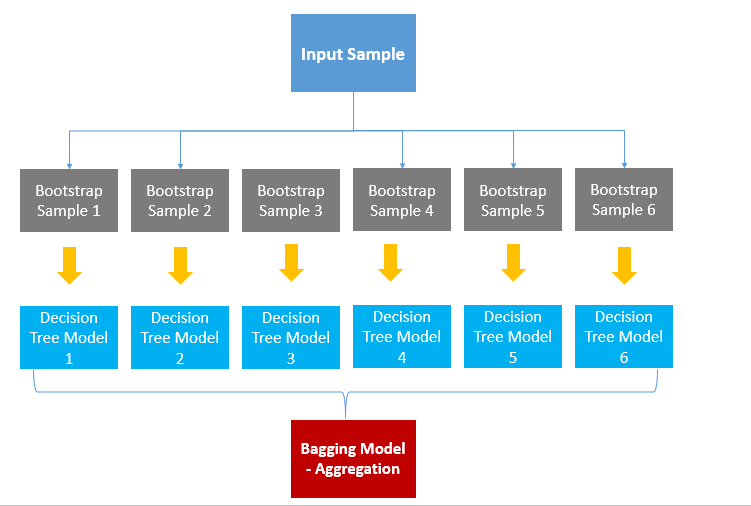

https://m.blog.naver.com/muzzincys/220201299384?view=img_2

부스팅(boosting)

잘못 분류된 개체들에 집중해서 새로운 분류 규칙을 만드는 단계를 반복하는 방법
즉 안좋은 예측모형들을 결합하여 좋은 예측 모형을 만드는것이 부스팅 알고리즘입니다. 

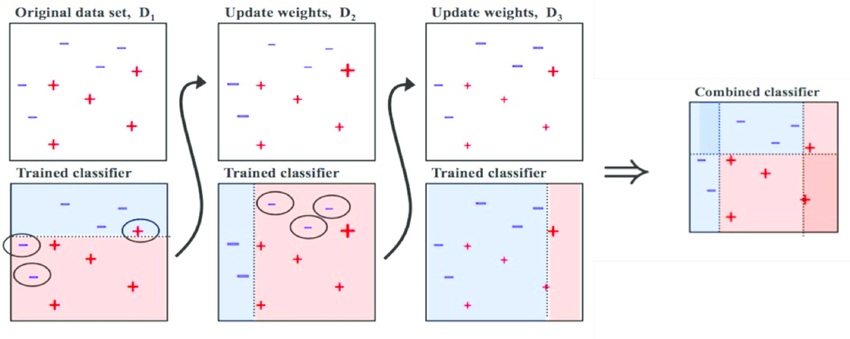

# https://m.blog.naver.com/muzzincys/220201299384?view=img_3

# 부스팅 방법의 초점은 예측변수를 순차적으로 생성하는 것
# 오분류된 개체들에게는 높은 가중치를 부여하고 정분류된 개체들에게는 낮은 가중치를 부여하여 오분류된 개체들이 더 잘 분류되도록 하는 방법

# 배깅과 부스팅의 차이 : 배깅은 병렬로 학습, 부스팅은 순차적으로 학습
# 부스팅은 배깅에 비해 error가 적습니다. 왜냐하면 오분류된 개체들을 초점을 두고 학습하기 때문에 오류가 적지만 대신에  속도는 느리고 오버피팅 될 가능성이 크다.
# 따라서 낮은 성능이 문제라면 부스팅을 사용하고 오버피팅이 문제라면 배깅이 적합

배깅 - randomforest

Random forest 알고리즘은 Decision Tree의 분류보다 정확도를 개선 시키기 위해 여러개의 나무를 생성하여 각각 나무의 예측을 총 조합하여 결론을 내리는 구조


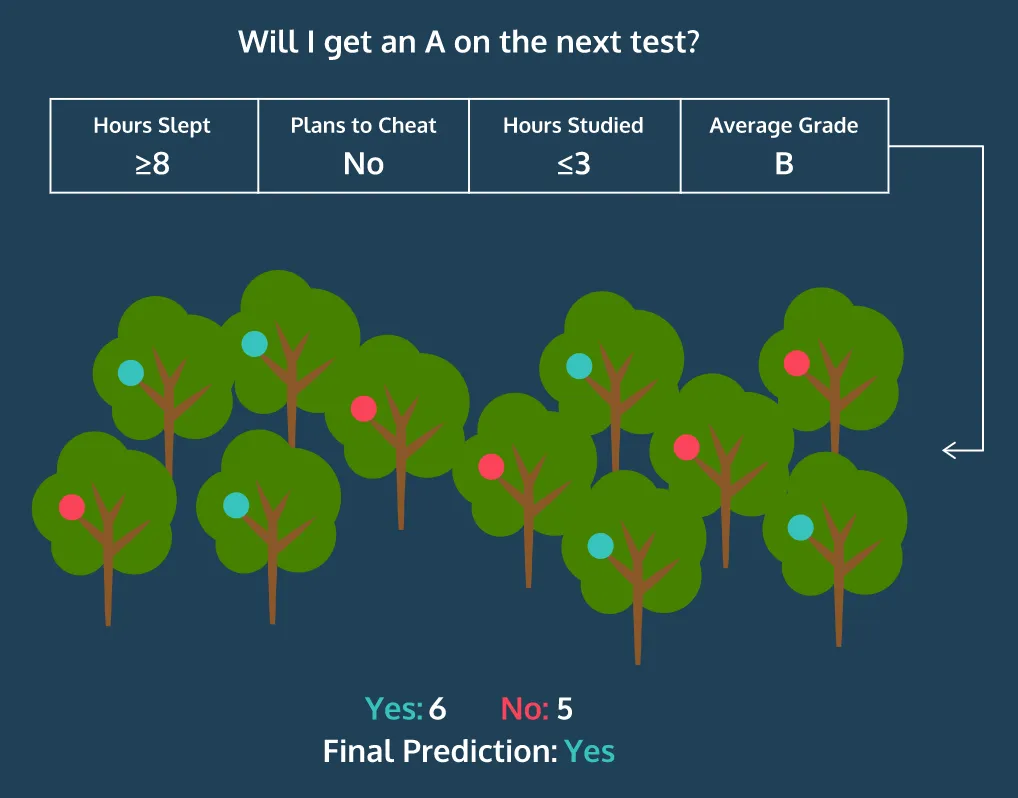

랜덤 포레스트는 앙상블 머신러닝 모델이다. 다수의 의사결정 트리를 만들고, 그 나무들의 분류를 집계해서 최종적으로 분류한다.

오버피팅을 피하기 위해 임의(random)의 숲을 구성하는 거다. 다수의 나무들로부터 분류를 집계하기 때문에 오버피팅이 나타나는 나무의 영향력을 줄일 수 있다.

나무를 만들 때는 모든 속성(feature)들에서 임의로 일부를 선택하고 그 중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할한다. 만약 데이터 세트에 n개의 속성이 있는 경우 n제곱근 개수만큼 무작위로 선택하는 것이 일반적이다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# RandomForest의 하이퍼 파라미터
model = RandomForestClassifier()
model
# n_estimators = 결정트리의 갯수를 지정 - 트리 갯수를 늘리면 성능은 좋아짐 하지만 너무 많이 늘리면 성능저하
# min_samples_split = 노드를 분할하기 위한 최소한의 샘플 데이터 수 - 과적합을 제어하는데 사용 
# min_samples_leaf = 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수 - 이것도 과적합 제어 용도
# max_features  = 최적의 분할을 위해 고려할 최대 feature 개수
# max_depth = 트리의  최대 깊이 - min_saples_split 보다 작아질때까지 분할 - 깊이가 min_samples_split보다 깊어지면 과적합
# max_leaf_nodes = 리프노드의 최대 개수


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

부스팅 - AdaBoost

Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

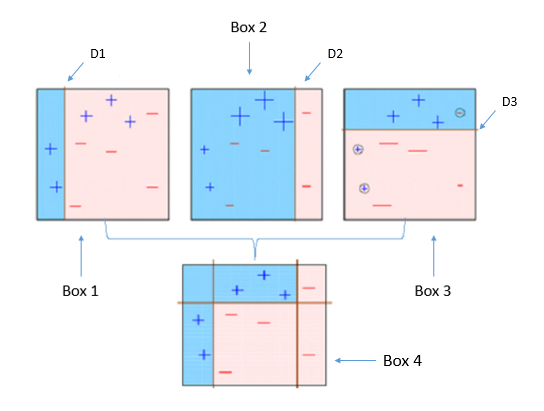

Step 1) 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 + 와 - 를 분류

Step 2) 잘못 분류된 데이터에 대해 가중치를 부여(두 번쨰 그림에서 커진 + 표시)

Step 3) 두 번째 약한 학습기가 두번째 분류기준(D2)으로 +와 - 를 다시 분류

Step 4) 잘못 분류된 데이터에 대해 가중치를 부여(세 번째 그림에서 커진 - 표시)

Step 5) 세 번째 약한 학습기가 세번째 분류기준으로(D3) +와 -를 다시 분류해서 오류 데이터를 찾음

Step 6) 마지막으로 분류기들을 결합하여 최종 예측 수행

→ 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여하여 모두 결합함으로써 개별 약한 학습기보다 높은 정확도의 예측 결과를 만듦

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

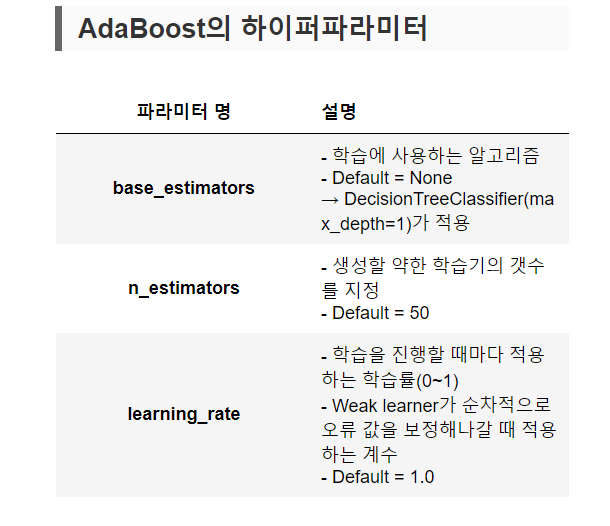

n_estimators를 늘린다면
생성하는 weak learner의 수는 늘어남

이 여러 학습기들의 decision boundary가 많아지면서 모델이 복잡해짐

learning_rate을 줄인다면
가중치 갱신의 변동폭이 감소해서,
 여러 학습기들의 decision boundary 차이가 줄어듦
위의 두 가지는 trade-off 관계입니다.
- trade off = 상충관계 : 하나를 얻기위해서는 나머지 하나를 희생해야된다는 개념  ex) 분산 과 편향

n_estimators(또는 learning_rate)를 늘리고,

learning_rate(또는 n_estimators)을 줄인다면 서로 효과가 상쇄됩다.

→ 때문에 이 두 파라미터를 잘 조정하는 것이 알고리즘의 핵심입니다.

# ---------------------------------------------------------------------

먼저 xgboost기법을 알아보기 전에 그 전 모델인 gradient boosting 설명

AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하여 최적화된 결과를 얻는 알고리즘입니다.

GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게되고
시간이 오래 걸린다는 단점이 있습니다.

※ 경사하강법

분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트

부스팅 - XGBoost

약한 분류기들을 세트로 묶어서 정확도를 예측하는 기법
병렬 처리를 사용하기 때문에 학습과 분류가 빠르다

y= m1(x)+m2(x)+m3(x)+error3(x)   가 된다.

이렇게 하면 m1,m2,m3 모델의 가중치가 같기 때문에, 서로 모델이 간섭을 하여, 좋은 결과를 내기 어렵다. 그래서, 각 모델에 가중치를 반영한다.

Y = w1 * M(x)+ w2 * G(x)+ w3 * H(x) + error

Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적인데, 이 알고리즘을 병렬  학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.

4. 파라미터

1) 일반 파라미터 - 도구의 모양을 결정
booster : 어떤 부스터 구조를 쓸지 결정한다. ( gbtree, gblinear, dart)

nthread : 몇개의 쓰레드를 동시에 처리하도록 할지 결정한다.

num_feature : feature차원의 숫자를 정해야하는 경우 옵션을 세팅.

2) 부스트 파라미터 - 트리마다 가지를 칠 때 적용하는 옵션을 정의

eta: learning rate와 같다. 트리에 가지가 많을 수록 과적합하기 쉽다. 매 부스팅 스탭마다 weight를 주어 부스팅 과정에 과적합이 일어나지 않도록 한다.

gamma: 정보흭득(information Gain)에서 -r로 표현한 바 있다. 이것이 커지면, 트리 깊이가 줄어들어 보수적인 모델이 된다. ( 디폴트는 0 )

max_depth : 한 트리의 maxium depth. 숫자가 클수록 보델의 복잡도가 커진다. 과적합 하기 쉽다. 

lambda (L2 reg-form) : L2 Regularization Form에 달리는 weights이다. 숫자가 클수록 보수적인 모델이 된다.

alpha(L1 reg-form) : L1 Regularization Form에 달리는 weights이다. 숫자가 클수록 보수적인 모델이 된다.

3) 학습과정 파라미터 - 최적화 퍼모먼스를 결정
objective : 목적함수이다. reg:linear(linear-regression), binary:logistic(binary-logistic-classification), count:poisson(count data poison regression) 등 다양

eval_metric : 모델의 평가 함수를 조정하는 함수 - rmse(root mean square error), logloss(log-likelihood), map(mean average precision) 등 데이터의 특성에 맞게 평가 함수를 조정

4) 커멘드 라인 파라미터
num_rounds : 부스팅 라운드를 결정한다. 랜덤하게 생성되는 모델이니만큼 이 수 가 적당히 큰게 좋다 epochs 옵션과 동일하다 .

In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

455 51
[15:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

xboost 는 굉장한 좋은 성능을 보여주었지만 학습시간이 느리다는 단점과 더불어 하이퍼 파라미터도 많다는 단점을 가져서 이를 보안해주기 위해 탄생힌것이 LigthtGBM

부스팅 - LightGBM




lightbgm은 boosting 알고리즘들과 다르게 동작합니다.
기존의 boosting 알고리즘들은 트리를 level-wise하게 늘어나는 방법을 사용했는데, lightgbm은 leaf wise 리프 중심으로 트리 분할을 합니다.
즉 기존의 알고리즘은 트리의 깊이를 줄이기위해서 level wise 균형을 잡아주기 위해서 트리 중심으로 분할을 했다면 lightgbm은 트리의 균형을 맞추지않고 리프 노드를 지속적으로 분할 하면서 진행함
따라서 비대칭적이고 깊은 트리가 생성되지만 동일한 leaf를 생성할때 leaf wise 는 level wise 보다 손실을 줄일 수 있다는 것이 장점입니다.

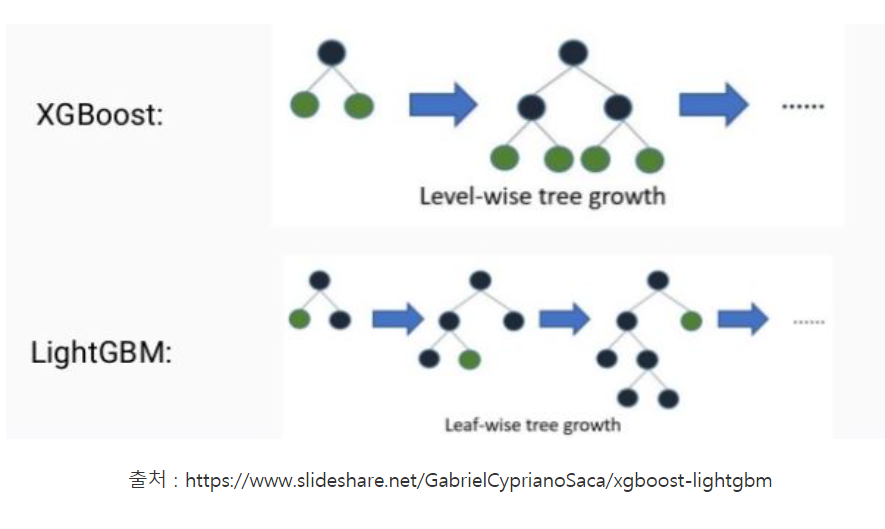

In [ ]:
from lightgbm import LGBMClassifier

lightbgm 은 leaf wise 방식의 알고리즘을 사용하기 때문에 leaf wise 방식의 하이퍼 파라미터 값이 추가가 됩니다.

n_estimators : 반복하려는 트리의 개수

learning_rate : 학습률

max_depth : 트리의 최대 깊이

min_child_sample : 리프 노드가 되기위한 최소한의 샘플 데이터 수

num_leaves : 하나의 트리가 가질 수 있는 최대 리프 개수

feature_fraction, reg_lambda, reg_alpha 등

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

부스팅 - catboost

기존의 부스팅 기법은 
1. 실제 값들의 평균과 실제 값의 차이인 잔차(Residual)를 구한다. 
2. 데이터로 이 잔차들을 학습하는 모델을 만든다. 
3. 만든 모델로 예측하여, 예측 값에 Learning_rate 를 곱해 실제 예측 값(평균 + 잔차예측 값*lr) 을 업데이트 한다. 
4. 1~3 반복


catboost기법은 xgboost 와 더불어 level wise 방식으로 트리를 만들어나갑니다. 

그리고 기존의 부스팅 알고리즘은 일괄적으로 모든 훈련 데이터를 대상으로 잔차계산을 했다면 catboost는 일부만 가지고 잔차계산을 한뒤 이걸로 모델을 만들고 그 뒤에 데이터의 잔차는 이모델로 예측한 값을 사용한다.

1. 먼저 x1 의 잔차만 계산하고, 이를 기반으로 모델을 만든다. 그리고 x2 의 잔차를 이 모델로 예측한다. 
2. x1, x2 의 잔차를 가지고 모델을 만든다. 이를 기반으로 x3, x4 의 잔차를 모델로 예측한다. 
3. x1, x2, x3, x4 를 가지고 모델을 만든다. 이를 기반으로 x5, x6, z7, x8 의 잔차를 모델로 예측한다. 
4. ... 반복


이렇게 순서에 따라 모델을 만들고 예측하는 방식을 ordered boosting 이라고 부른다.


결론 기존의 boosting 기법 알고리즘들의 학습속도 오버피팅 등 문제를 보완하기위해 만들어진것이
xgboost, catboost, lightgbm 알고리즘들 이다.

기존의 알고리즘을 보완하기위해 xgboost가 등장했고 xgboost의 장점은 크게 4가지 1)병렬처리를 통한 빠른 학습 2)유연한학습 3)오버피팅 방지 4)다양성
그래도 속도가 느려서 등장한것이 lightgmb이다. lightgbm이름처럼 light가볍다는 의미를 가지기에 속도문제,정확도문제 해결 하지만 데이터셋이 많지 않을 경우 lightgbm은 과적합이 상대적으로 발생하기 쉽다는 단점이있다 따라서 데이터가 많지 않을때는 사용 x

그리고 최근에 나온것이 catboost 모델입니다. 범주형을 처리하는데 유용한 알고리즘 따라서 범주형 데이터인경우에는 catboost모델을 사용하는것이 좋다.